In [1]:
import cv2
import matplotlib.pyplot as plt
import albumentations as A

In [2]:
img = cv2.imread(r'D:\0-Code\PG\2_sem\0_Dyplom\ai-capstone-proj\examples\image_0000005.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
img.shape

(2856, 1904, 3)

In [4]:
import numpy.typing as npt
import pandas as pd
from src.annotation_extractor import xml_annotations_to_dataframe

df: pd.DataFrame = xml_annotations_to_dataframe('examples')

bboxes = df[['xmin', 'ymin', 'xmax', 'ymax']].to_numpy()
label_columns = ['Background', 'Crack', 'Spallation', 'Efflorescence', 'ExposedBars', 'CorrosionStain']
label_vals = [tuple(x) for x in df[label_columns].to_numpy()]

def add_padding(image: cv2.Mat, bbox_values: list[int], label_values: tuple,
                bbox_coord_format='pascal_voc'):
    width = image.shape[0]
    height = image.shape[1]
    
    bboxparams = A.BboxParams(format=bbox_coord_format, label_fields=['label_fields'])
    
    pipeline = {}
        
    if width > height:
        pipeline = A.Compose([
            A.PadIfNeeded(width, width, border_mode=cv2.BORDER_CONSTANT)
        ], bbox_params=bboxparams)
    else:
        pipeline = A.Compose([
            A.PadIfNeeded(width, width, border_mode=cv2.BORDER_CONSTANT)
        ], bbox_params=bboxparams)

    transformed = pipeline(image=image, bboxes=bboxes, label_fields=label_vals)

    return transformed['image'], transformed['bboxes'], transformed['label_fields']
        
img = add_padding(img, bboxes, label_vals)


In [5]:
img[1]


array([[1137.,  472., 1468., 1857.],
       [1983.,  505., 2380., 2856.]], dtype=float32)

In [6]:
label_values

NameError: name 'label_values' is not defined

2

In [19]:
import numpy as np
# Define augmentation pipeline
transform = A.Compose([
            A.RandomOrder ([
                A.HorizontalFlip(p=0.5),
                A.RandomBrightnessContrast(p=0.2, brightness_limit=(-0.2, 0.2), 
                                            contrast_limit=(-0.2, 0.2),
                                            brightness_by_max=True)
                ], bbox_params=A.BboxParams(
                    format='pascal_voc',
                    label_fields=['label_values']), n=np.random.randint(1,3)),
        
    ],
    bbox_params=A.BboxParams(format='pascal_voc')
)



TypeError: RandomOrder.__init__() got an unexpected keyword argument 'bbox_params'

In [18]:
augmented = transform(image=img, bboxes=bboxes, label_fields=label_values)

ValueError: Key label_fields is not in available keys.

BBoxes: [[ 661  472  992 1857]
 [1507  505 1904 2856]]
Label Values: [(0, 0, 0, 1, 0, 1), (0, 0, 0, 1, 0, 1)]


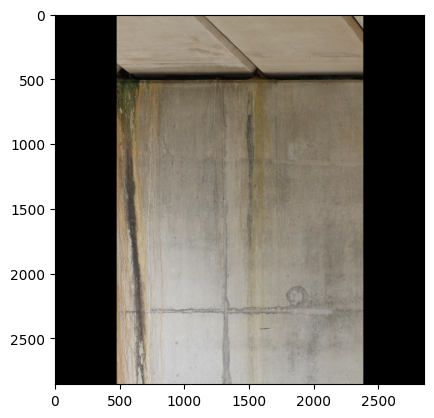

In [ ]:
aug_image = augmented['image']
aug_bboxes = augmented['bboxes']
aug_label_values = augmented['label_fields']
plt.imshow(aug_image)
plt.show()

In [53]:
aug_label_values

[[0, 0, 0, 1, 0, 1], [0, 0, 0, 1, 0, 1]]

In [50]:
import matplotlib.pyplot as plt
def draw_bounding_box(xmin:int, ymin:int, xmax:int, ymax:int, edge_color: str, linewidth: int):
    width = xmax - xmin
    height = ymax - ymin
    x = xmin
    y = ymin
    
    return plt.Rectangle((x, y), width=width, height=height, edgecolor=edge_color, facecolor='none', linewidth=2)

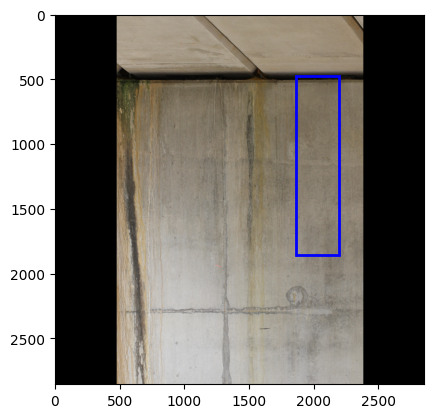

In [52]:
bbox1 = draw_bounding_box(aug_bboxes[0][0], aug_bboxes[0][1], aug_bboxes[0][2], aug_bboxes[0][3], 'blue', 2)
fig, ax = plt.subplots()
ax.imshow(aug_image)
ax.add_patch(bbox1)
plt.imshow(aug_image)
plt.show()

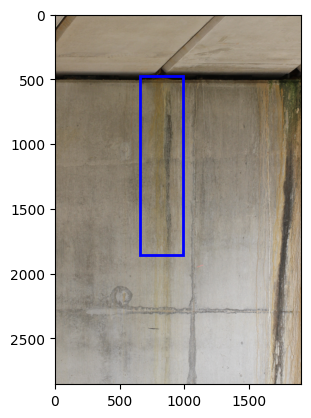

In [51]:
orgbbox = draw_bounding_box(bboxes[0][0], bboxes[0][1], bboxes[0][2], bboxes[0][3], 'blue', 2)
fig, ax = plt.subplots()
ax.imshow(img)
ax.add_patch(orgbbox)

plt.show()

In [46]:
print(orgbbox)

Rectangle(xy=(1507, 2856), width=397, height=2351, angle=0)


In [14]:
aa = []

for x, y in df.groupby('img'):
    aa.append(y)
    
